# Identifying the Problem
Since the beginning of the 21st century, acts of terrorism have been ever growing. The destruction of the World Trade Centre in 2001 ushered in a new era of global fear and uneasiness, feelings which hadn’t been at the surface of our everyday lives since the Cold war. Monumentally devastating events such as these have paved the way for growth in the areas of anti-terrorism and security. One such area in particular looks at linking a terrorist act with a specific terrorist organization in an attempt to better understand who and where may be at most risk of an attack. This paper demonstrates how information gathered from the Global Terrorism Database (GTD) can be analyzed with the purpose of predicting the perpetrators behind such heinous crimes.    

# Data Preprocessing

In [1]:
import pandas as pd

#read in csv 
data = pd.read_csv('globalterrorismdb_shorter.csv')
data.head(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt,ishostkid,nhostkid,dbsource
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,PGIS
1,197000000002,1970,0,0,0,130,Mexico,1,North America,NaN,...,0.0,NaN,0.0,NaN,0,NaN,NaN,1.0,1.0,PGIS
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,PGIS
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,PGIS
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,PGIS


In [2]:
#return the number of rows/colunms in the DB
data.shape

(170350, 58)

In [3]:
#select only a few columns
subdata = data[["iyear", "country_txt", "latitude", "longitude", "attacktype1_txt", "targtype1_txt", "weaptype1_txt", "natlty1_txt", "targsubtype1_txt", "gname"]]
subdata.head(10)

,iyear,country_txt,latitude,longitude,attacktype1_txt,targtype1_txt,weaptype1_txt,natlty1_txt,targsubtype1_txt,gname
0,1970,Dominican Republic,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,Dominican Republic,Named Civilian,MANO-D
1,1970,Mexico,19.432608,-99.133207,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,Belgium,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League
2,1970,Philippines,15.478598,120.599741,Assassination,Journalists & Media,Unknown,United States,Radio Journalist/Staff/Facility,Unknown
3,1970,Greece,37.983773,23.728157,Bombing/Explosion,Government (Diplomatic),Explosives/Bombs/Dynamite,United States,Embassy/Consulate,Unknown
4,1970,Japan,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,United States,Embassy/Consulate,Unknown
5,1970,United States,37.005105,-89.176269,Armed Assault,Police,Firearms,United States,"Police Building (headquarters, station, school)",Black Nationalists
6,1970,Uruguay,-34.891151,-56.187214,Assassination,Police,Firearms,Uruguay,Police Security Forces/Officers,Tupamaros (Uruguay)
7,1970,United States,37.805065,-122.273024,Bombing/Explosion,Utilities,Explosives/Bombs/Dynamite,United States,Electricity,Unknown
8,1970,United States,43.076592,-89.412488,Facility/Infrastructure Attack,Military,Incendiary,United States,Military Recruiting Station/Academy,New Year's Gang
9,1970,United States,43.072950,-89.386694,Facility/Infrastructure Attack,Government (General),Incendiary,United States,Government Building/Facility/Office,New Year's Gang


In [4]:
subdata = subdata.dropna(axis=0, how='any')
subdata.head(10)

,iyear,country_txt,latitude,longitude,attacktype1_txt,targtype1_txt,weaptype1_txt,natlty1_txt,targsubtype1_txt,gname
0,1970,Dominican Republic,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,Dominican Republic,Named Civilian,MANO-D
1,1970,Mexico,19.432608,-99.133207,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,Belgium,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League
2,1970,Philippines,15.478598,120.599741,Assassination,Journalists & Media,Unknown,United States,Radio Journalist/Staff/Facility,Unknown
3,1970,Greece,37.983773,23.728157,Bombing/Explosion,Government (Diplomatic),Explosives/Bombs/Dynamite,United States,Embassy/Consulate,Unknown
4,1970,Japan,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,United States,Embassy/Consulate,Unknown
5,1970,United States,37.005105,-89.176269,Armed Assault,Police,Firearms,United States,"Police Building (headquarters, station, school)",Black Nationalists
6,1970,Uruguay,-34.891151,-56.187214,Assassination,Police,Firearms,Uruguay,Police Security Forces/Officers,Tupamaros (Uruguay)
7,1970,United States,37.805065,-122.273024,Bombing/Explosion,Utilities,Explosives/Bombs/Dynamite,United States,Electricity,Unknown
8,1970,United States,43.076592,-89.412488,Facility/Infrastructure Attack,Military,Incendiary,United States,Military Recruiting Station/Academy,New Year's Gang
9,1970,United States,43.072950,-89.386694,Facility/Infrastructure Attack,Government (General),Incendiary,United States,Government Building/Facility/Office,New Year's Gang


In [36]:
#remove rows with unknown values
cleaned_data = subdata[(subdata["country_txt"]=="Philippines") & (subdata["attacktype1_txt"]!="Unknown") 
                       & (subdata["weaptype1_txt"]!="Unknown") & (subdata["targtype1_txt"]!="Unknown")
                       & (subdata["gname"]!="Unknown") & (subdata["natlty1_txt"]!="Unknown") 
                       & (subdata["targsubtype1_txt"]!="Unknown") ]

cleaned_data.head(15)

,iyear,country_txt,latitude,longitude,attacktype1_txt,targtype1_txt,weaptype1_txt,natlty1_txt,targsubtype1_txt,gname
323,1970,Philippines,14.677301,121.044348,Bombing/Explosion,Government (Diplomatic),Explosives/Bombs/Dynamite,United States,Embassy/Consulate,Kabataang Makabayan (KM)
785,1971,Philippines,14.596051,120.978666,Hijacking,Airports & Aircraft,Firearms,Philippines,Aircraft (not at an airport),Students
3536,1976,Philippines,16.799036,121.122622,Facility/Infrastructure Attack,Business,Incendiary,Philippines,Construction,New People's Army (NPA)
3539,1976,Philippines,16.799036,121.122622,Armed Assault,Military,Firearms,Philippines,Military Unit/Patrol/Convoy,New People's Army (NPA)
3775,1976,Philippines,7.074044,125.616549,Hijacking,Airports & Aircraft,Firearms,Philippines,Aircraft (not at an airport),Muslim Rebels
4252,1976,Philippines,15.153002,120.591942,Armed Assault,Private Citizens & Property,Firearms,Philippines,Village/City/Town/Suburb,New People's Army (NPA)
5118,1977,Philippines,14.838794,120.285018,Armed Assault,Police,Firearms,Philippines,Police Patrol (including vehicles and convoys),New People's Army (NPA)
5142,1977,Philippines,14.838794,120.285018,Armed Assault,Military,Firearms,Philippines,Military Unit/Patrol/Convoy,New People's Army (NPA)
5739,1978,Philippines,6.908868,122.077200,Bombing/Explosion,Business,Explosives/Bombs/Dynamite,Philippines,Multinational Corporation,Moro National Liberation Front (MNLF)
5839,1978,Philippines,14.596051,120.978666,Assassination,Government (Diplomatic),Melee,India,"Diplomatic Personnel (outside of embassy, cons...",Ananda Marga


In [37]:
#return the rows/columns of cleaned data
cleaned_data.shape

(3138, 10)

# Performing Analytics over Data

In [38]:
#list the groups by how many times they appear in the dataset
listOfGroups = cleaned_data["gname"].value_counts()
listOfGroups[:20]

New People's Army (NPA)                        1828
Abu Sayyaf Group (ASG)                          382
Moro Islamic Liberation Front (MILF)            284
Bangsamoro Islamic Freedom Movement (BIFM)      282
Moro National Liberation Front (MNLF)           143
April 6th Liberation Movement                    25
Communists                                       21
Jemaah Islamiya (JI)                             17
Maute Group                                      14
Alex Boncayao Brigade (ABB)                      11
Muslim Rebels                                    11
Al-Khobar                                        10
Islamic State of Iraq and the Levant (ISIL)       8
Muslim Militants                                  7
Reform of the Armed Forces Movement               7
Muslim Separatists                                7
Muslim extremists                                 7
Muslims                                           7
Muslim Guerrillas                                 5
Ansar Al-Khi

In [39]:
#list the attacks be the frequency
listOfAttacks = cleaned_data["attacktype1_txt"].value_counts()
listOfAttacks

Armed Assault                          1243
Bombing/Explosion                       983
Assassination                           324
Facility/Infrastructure Attack          273
Hostage Taking (Kidnapping)             273
Hostage Taking (Barricade Incident)      25
Hijacking                                16
Unarmed Assault                           1
Name: attacktype1_txt, dtype: int64

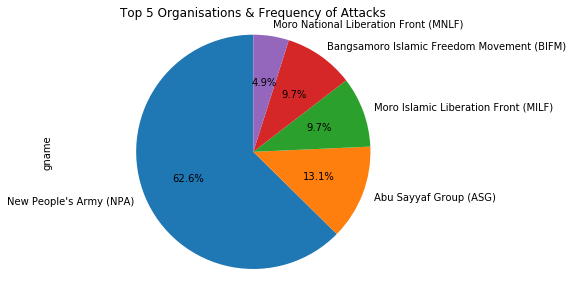

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

#only use first 5 values 
listOfGroups = listOfGroups[:5]

listOfGroups.plot.pie(x="y".index,
               shadow=False,   # exploding 'Friday'
               startangle=90,
               autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()

plt.title("Top 5 Organisations & Frequency of Attacks")
plt.show()

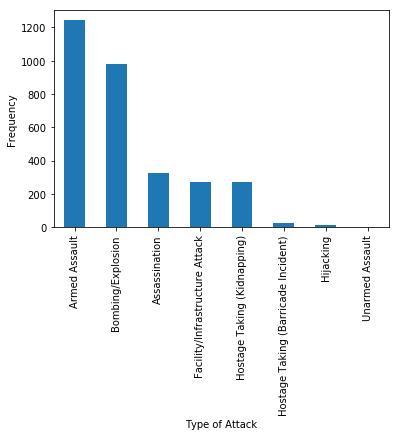

In [41]:
#plot the list of attacks as a bar chart
listOfAttacks.plot.bar()
plt.ylabel("Frequency")
plt.xlabel("Type of Attack")
plt.show()

In [42]:
#find the number of attacks each year
listOfYears = cleaned_data["iyear"].value_counts()
listOfYears = listOfYears.sort_index()
listOfYears

1970      1
1971      1
1976      4
1977      2
1978     25
1979     19
1980     42
1981      6
1982     17
1983      8
1984      6
1985     38
1986     16
1987     93
1988    134
1989    103
1990    151
1991     74
1992     54
1994     27
1995     21
1996     17
1997     12
1998     11
1999     23
2000    105
2001     37
2002     36
2003     81
2004     21
2005     17
2006     25
2007     28
2008    128
2009     93
2010     67
2011     62
2012    131
2013    296
2014    382
2015    456
2016    268
Name: iyear, dtype: int64

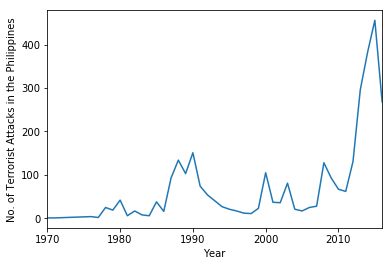

In [43]:
#plot a line graph showing the trend of attacks each year between 1970 and 2016
listOfYears.plot()
plt.ylabel("No. of Terrorist Attacks in the Philippines")
plt.xlabel("Year")
plt.show()

In [44]:
#return a dataframe of all latitudes and longitudes from the cleaned_data
locationsData = cleaned_data[["latitude", "longitude"]]
locationsData.head(10)

,latitude,longitude
323,14.677301,121.044348
785,14.596051,120.978666
3536,16.799036,121.122622
3539,16.799036,121.122622
3775,7.074044,125.616549
4252,15.153002,120.591942
5118,14.838794,120.285018
5142,14.838794,120.285018
5739,6.908868,122.077200
5839,14.596051,120.978666


In anaconda prompt, type conda install -c conda-forge basemap to install Basemap package

In [45]:
#import basemap
from mpl_toolkits.basemap import Basemap

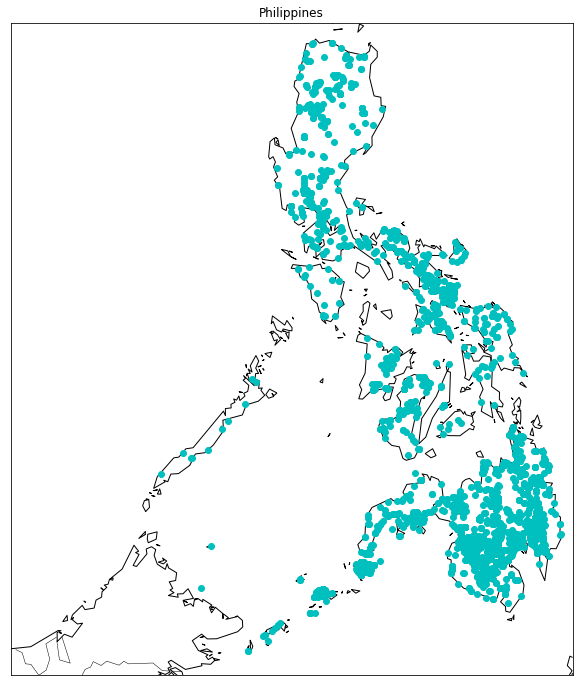

In [46]:
#create basemap frame
m = Basemap(projection='lcc', lat_0 = 11, lon_0 = 123,
    resolution = 'l', area_thresh = 0.05,
    llcrnrlon=114, llcrnrlat=4,
    urcrnrlon=127, urcrnrlat=19)


#set the size
plt.figure(figsize=(24,12))

#draw the coast lines and country borders
m.drawcoastlines()
m.drawcountries()

#for loop which iterates throught the location dataframe and plots each value based on latitudes and longitude
for index, row in locationsData.iterrows():
    PLPNSlat, PLPNSlon = row["latitude"], row["longitude"]
    xpt, ypt = m(PLPNSlon, PLPNSlat)
    m.plot(xpt, ypt, "co")

#set title
plt.title('Philippines')

plt.show()

The columns which are deemed most valuable for the decision tree are placed into there own dataframe 

In [47]:
#selecting attributes
cleaned_data = cleaned_data[["attacktype1_txt", "targtype1_txt", "weaptype1_txt", "natlty1_txt", "targsubtype1_txt", "gname"]]

cleaned_data.head(10)

,attacktype1_txt,targtype1_txt,weaptype1_txt,natlty1_txt,targsubtype1_txt,gname
323,Bombing/Explosion,Government (Diplomatic),Explosives/Bombs/Dynamite,United States,Embassy/Consulate,Kabataang Makabayan (KM)
785,Hijacking,Airports & Aircraft,Firearms,Philippines,Aircraft (not at an airport),Students
3536,Facility/Infrastructure Attack,Business,Incendiary,Philippines,Construction,New People's Army (NPA)
3539,Armed Assault,Military,Firearms,Philippines,Military Unit/Patrol/Convoy,New People's Army (NPA)
3775,Hijacking,Airports & Aircraft,Firearms,Philippines,Aircraft (not at an airport),Muslim Rebels
4252,Armed Assault,Private Citizens & Property,Firearms,Philippines,Village/City/Town/Suburb,New People's Army (NPA)
5118,Armed Assault,Police,Firearms,Philippines,Police Patrol (including vehicles and convoys),New People's Army (NPA)
5142,Armed Assault,Military,Firearms,Philippines,Military Unit/Patrol/Convoy,New People's Army (NPA)
5739,Bombing/Explosion,Business,Explosives/Bombs/Dynamite,Philippines,Multinational Corporation,Moro National Liberation Front (MNLF)
5839,Assassination,Government (Diplomatic),Melee,India,"Diplomatic Personnel (outside of embassy, cons...",Ananda Marga


In [48]:
cleaned_data.shape

(3138, 6)

In [49]:
#import numpy
import numpy as np

In [50]:
#check the uniqe occurences of values in the 'weaptype1_txt' column
cleaned_data['weaptype1_txt'].unique()

array(['Explosives/Bombs/Dynamite', 'Firearms', 'Incendiary', 'Melee'], dtype=object)

In [51]:
#return frequency of weapon types
class_group = cleaned_data.groupby('weaptype1_txt').apply(lambda x: len(x))
class_group

weaptype1_txt
Explosives/Bombs/Dynamite    1059
Firearms                     1820
Incendiary                    232
Melee                          27
dtype: int64

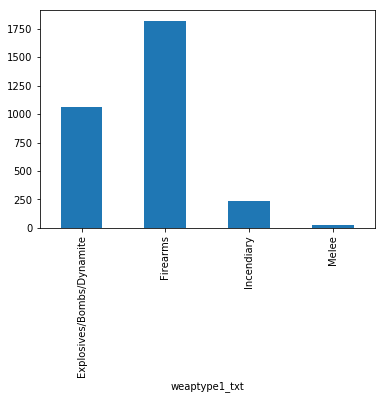

In [52]:
#plot weapon frequency as a bar chart
class_group.plot(kind='bar', grid=False)

# Experimental Evaluation

## Decision Tree Classifier

Columns which are deemed most valuable are selected. As all data is categorical, it must be vectorised before it is passed into the Decision Tree.

In [53]:
#import the packages necessary to vectorise the data
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

#choosing the columns to train with
cols_to_keep = ["attacktype1_txt", "targtype1_txt", "weaptype1_txt", "natlty1_txt", "targsubtype1_txt"]


X_feature = cleaned_data[cols_to_keep]
X_dict = X_feature.T.to_dict().values()

#turn list of dictionaries into an array
vect = DictVectorizer(sparse=False)
X_vector = vect.fit_transform(X_dict)

#print all names
vect.get_feature_names()

['attacktype1_txt=Armed Assault',
 'attacktype1_txt=Assassination',
 'attacktype1_txt=Bombing/Explosion',
 'attacktype1_txt=Facility/Infrastructure Attack',
 'attacktype1_txt=Hijacking',
 'attacktype1_txt=Hostage Taking (Barricade Incident)',
 'attacktype1_txt=Hostage Taking (Kidnapping)',
 'attacktype1_txt=Unarmed Assault',
 'natlty1_txt=Australia',
 'natlty1_txt=Austria',
 'natlty1_txt=Belgium',
 'natlty1_txt=Canada',
 'natlty1_txt=China',
 'natlty1_txt=Germany',
 'natlty1_txt=Great Britain',
 'natlty1_txt=India',
 'natlty1_txt=Indonesia',
 'natlty1_txt=International',
 'natlty1_txt=Ireland',
 'natlty1_txt=Italy',
 'natlty1_txt=Japan',
 'natlty1_txt=Malaysia',
 'natlty1_txt=Multinational',
 'natlty1_txt=Netherlands',
 'natlty1_txt=New Zealand',
 'natlty1_txt=Norway',
 'natlty1_txt=Pakistan',
 'natlty1_txt=Philippines',
 'natlty1_txt=Singapore',
 'natlty1_txt=South Korea',
 'natlty1_txt=Sri Lanka',
 'natlty1_txt=Sweden',
 'natlty1_txt=Switzerland',
 'natlty1_txt=Taiwan',
 'natlty1_txt

In [54]:
import random

#shuffle the dataset pre splitting
random.shuffle(X_vector)

##the array is shuffled then split into two groups. 70% of array for training and 30% for testing
X_Train = X_vector[0:2200]
X_Test = X_vector[2200:3138] 

In [55]:
len(X_vector)

3138

In [56]:
len(X_Train)

2200

In [57]:
len(X_Test)

938

In [58]:
(len(X_Train)/3138)*100 # Training data as a percentage of the overall array

70.10834926704908

In [59]:
(len(X_Test)/3138)*100 # Testing data as a percentage of the overall array

29.891650732950925

In [60]:
label = LabelEncoder()
#choose value to test against
y_train = label.fit_transform(cleaned_data['gname'][0:2200])

In [61]:
from sklearn import tree

#create decision tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_Train,y_train)

In [62]:
label.inverse_transform(clf.predict(X_Test))

array(["New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)",
       'Bangsamoro Islamic Freedom Movement (BIFM)',
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", 'Abu Sayyaf Group (ASG)',
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       'Bangsamoro Islamic Freedom Movement (BIFM)',
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       

In [63]:
Train_predict = clf.predict(X_Train)

In [64]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy:', accuracy_score(y_train, Train_predict))
print(classification_report(y_train, Train_predict))

Accuracy: 0.602727272727
             precision    recall  f1-score   support

          0       0.48      0.19      0.27       227
          1       0.50      0.14      0.22         7
          2       0.00      0.00      0.00         1
          3       0.50      0.18      0.27        11
          4       0.00      0.00      0.00         1
          5       0.00      0.00      0.00         1
          6       0.00      0.00      0.00         1
          7       0.50      0.08      0.14        25
          8       0.50      0.18      0.27       110
          9       0.00      0.00      0.00         1
         10       0.00      0.00      0.00         1
         11       0.00      0.00      0.00         1
         12       1.00      0.10      0.17        21
         13       0.00      0.00      0.00         1
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         1
         17       0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Results of Decision Tree
The results of the Decision Tree show that given the columns: 
**attacktype1_txt , targtype1_txt, weaptype1_txt, natlty1_txt, targsubtype1_txt** 
then the **gname** can be determined to an accuracy of 55%, which is not a strong enough 
result to use as a definitive predictor of the terrorist group. 

## Random Forest
(I did not get this to predict a result that seemed consistent or correct, leaving the code here)

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import StratifiedKFold # Add important libs

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [467]:
parameter_gridsearch = {
                 'max_depth' : [1, 2], 
                 'n_estimators': [50, 20], 
                 'max_features': ['sqrt', 'auto', 'log2'],      
                 'min_samples_split': [2],      
                 'min_samples_leaf': [1, 3, 4],
                 'bootstrap': [True, False],
                 }

In [468]:
randomforest = RandomForestClassifier()
crossvalidation = StratifiedKFold(X_Train[0::,0] , n_folds=5)

gridsearch = GridSearchCV(randomforest, scoring='accuracy', param_grid=parameter_gridsearch, cv=crossvalidation)

gridsearch.fit(X_Train[0::,1::], X_Train[0::,0])    #train[0::,0] is as target
model = gridsearch
parameters = gridsearch.best_params_

In [469]:
print('Best Score: {}'.format(gridsearch.best_score_))

Best Score: 0.8378545006165228
